### Problem Statement-

1. To analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions
2. to understand the spending habits differ between male and female customers

In [109]:
#import all libraries-
#numpy for numerical operations
#pandas for dataframe operations
#matplotlib and seaborn for data visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [110]:
# read the Walmart data comma seperated file and create panda dataframe

df=pd.read_csv("walmart_data.csv")

In [111]:
 # checking top 5 rows

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [112]:
 # checking bottom 5 rows
    
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


### Usual data analysis 

In [113]:
#gives the shape of dataframe

df.shape

#550068 rows and 10 columns in the dataset

(550068, 10)

In [114]:
#Are there any duplicate values?

df.duplicated().sum() 

#no duplicate rows are present

0

In [115]:
#number of unique values in each column

df.nunique().reset_index()

,index,0
0,User_ID,5891
1,Product_ID,3631
2,Gender,2
3,Age,7
4,Occupation,21
5,City_Category,3
6,Stay_In_Current_City_Years,5
7,Marital_Status,2
8,Product_Category,20
9,Purchase,18105


In [116]:
#gives bird eye view of complete dataframe.

df.info()

#Columns are object type and integer type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category              550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Obs- 5 columns are integer and 5 are object type

In [117]:
#describes statistical summary of dataframe.
#count of no. of records,mean of continuous values,std,
#min continuous value, max continuous value etc

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Obs-
Median of purchase amounts is 8047, Max is 23961 and min is 12.


In [118]:
#gives descrption of object type of data

df.describe(include="object")

#Product has 3 categories, Gender and Marital Status has 2 categories.

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


Obs-
1. 26-35 age group is on top and 7 unique age.
2. city_category B is on top and 3 types of categories data available.
3. Male is on top.
4. 1 year stay in current city people are on top.

### Checking Null Values

In [119]:
 # checking null values

df.isna().any()

#no null values are present in the dataset

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

In [120]:
#This dataframe doesnt contain any null values...So no need to handle them

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Unique values in Columns

In [121]:
# This is to look at what all unique values have . Just trying to use python

list_col=["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category"]
for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))
    
#here occupation and product category are masked

GENDER :['F' 'M'] 
AGE :['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 
OCCUPATION :[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 
CITY_CATEGORY :['A' 'C' 'B'] 
STAY_IN_CURRENT_CITY_YEARS :['2' '4+' '3' '1' '0'] 
MARITAL_STATUS :[0 1] 
PRODUCT_CATEGORY :[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 


# Univariate Analysis

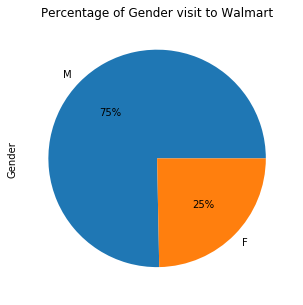

In [122]:
# Gender Analysis

df["Gender"].value_counts().plot(kind="pie",autopct='%1.0f%%',figsize=(10,5),title="Percentage of Gender visit to Walmart")

Obs- Males ratio(3/4) is much higher as compare to female(1/4).

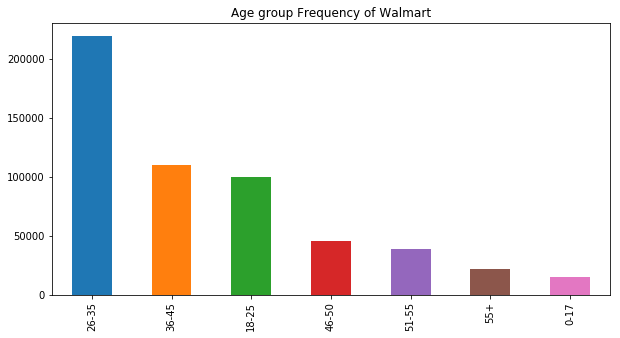

In [123]:
# Age Analysis

df["Age"].value_counts().plot(kind="bar",figsize=(10,5),title="Age group Frequency of Walmart")

Obs- (26-35) Age group is frequent user of walmart then 36-45 and so on.

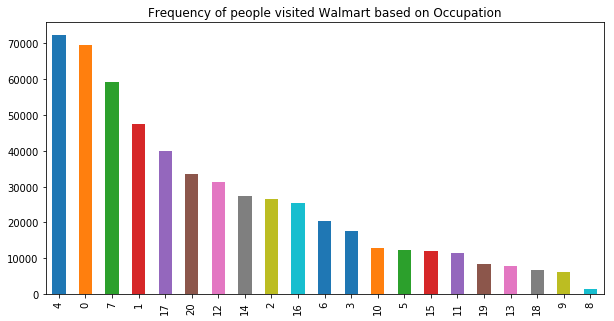

In [124]:
# Occupation Analysis

df["Occupation"].value_counts().plot(kind="bar",figsize=(10,5), title="Frequency of people visited Walmart based on Occupation")

Obs- People having occupation 4,0,and 7 are top three frequent walmart user

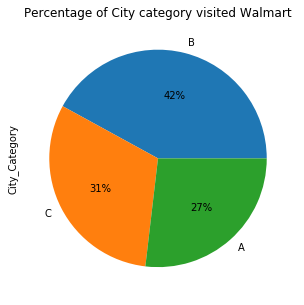

In [125]:
# City Category Analysis

df["City_Category"].value_counts().plot(kind="pie",figsize=(10,5),autopct='%1.0f%%', title="Percentage of City category visited Walmart")

Obs- B city category is most common user of Walmart.

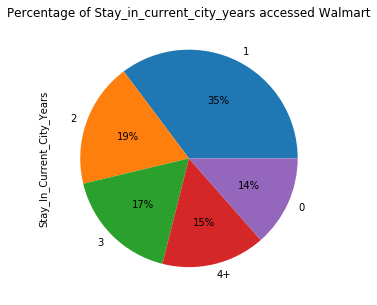

In [126]:
# Stay in current city Analysis

df["Stay_In_Current_City_Years"].value_counts().plot(kind="pie",figsize=(10,5),autopct='%1.0f%%',title="Percentage of Stay_in_current_city_years accessed Walmart")

Obs-people stay in the current city for 1 year are frequent to walmart.

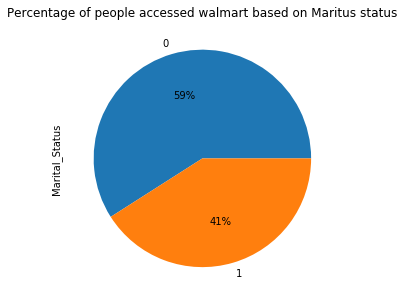

In [127]:
#Marital_status Analysis
df["Marital_Status"].value_counts().plot(kind="pie",figsize=(10,5),autopct='%1.0f%%',title="Percentage of people accessed walmart based on Maritus status")

Obs- 0 martial status people are more frequent to walmart.

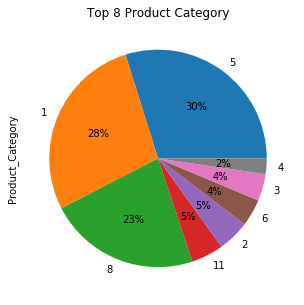

In [128]:
# Product Category Analysis

df["Product_Category"].value_counts()[:8].plot(kind="pie",figsize=(10,5),autopct='%1.0f%%', title="Top 8 Product Category")

Obs-Out of 21 Product category, 5,1 and 8 are most taken ones.

#### Here I am assuming 0 as unmarried and 1 as married for analysis.

In [129]:
##Converting marital status into categorical
#Assuming 0="Unmarried" and 1="Married"

df['Marital_Status'] = df['Marital_Status'].replace([0,1],["Unmarried","Married"])

### Outlier Treatment

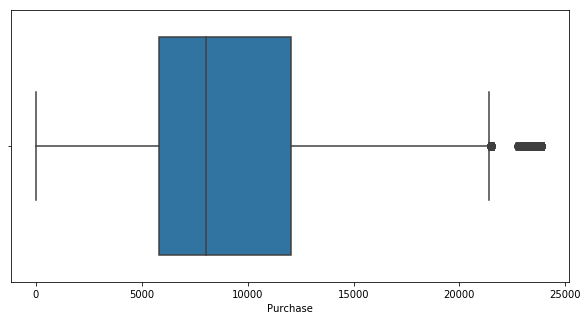

In [130]:
# for column Purchase

plt.figure(figsize=(10,5))
sns.boxplot(data = df, x='Purchase')
plt.show()

Obs- Purchase amount greater than 21000- 22000 are seems to be outliers

# Bivariate Analysis

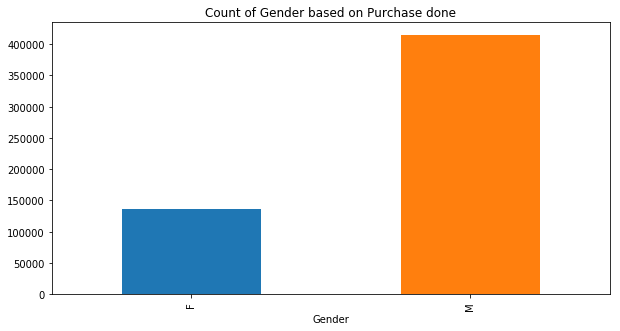

In [131]:
#Analysis Gender and Purchase

df.groupby(df["Gender"])["Purchase"].count().plot(kind="bar",figsize=(10,5),title="Count of Gender based on Purchase done")


Obs- Out of total purchase, male purchase far more number of times than female.

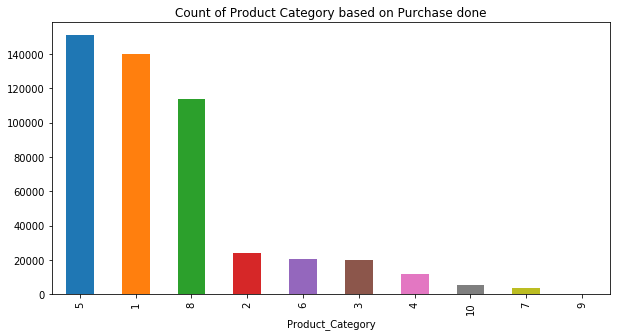

In [133]:
#Analysis of Product_Category and Purchase

df.groupby(df["Product_Category"])["Purchase"].count()[0:10,].sort_values(ascending=False).plot(kind="bar",figsize=(10,5),title="Count of Product Category based on Purchase done")

Obs- Out of top 10 Product Category, 5,1 and 8 are most purchased ones.

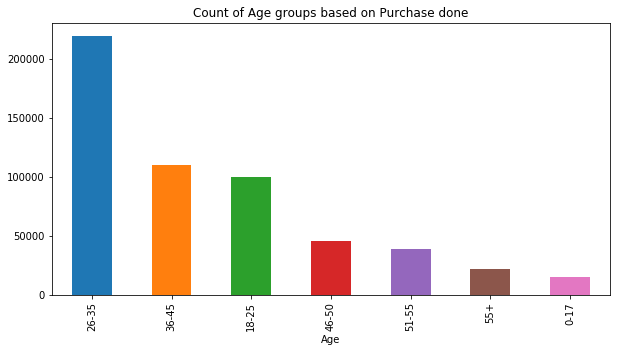

In [134]:
# Analysis of Age and Purchase

df.groupby(df["Age"])["Purchase"].count().sort_values(ascending=False).plot(kind="bar",figsize=(10,5),title="Count of Age groups based on Purchase done")

Obs- In all given Age categories, 26-35 age group people are more frequent to walmart

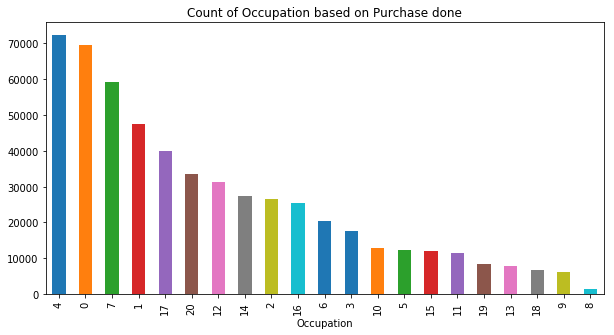

In [135]:
# Analysis of Occupation and Purchase

df.groupby(df["Occupation"])["Purchase"].count().sort_values(ascending=False).plot(kind="bar",figsize=(10,5),title="Count of Occupation based on Purchase done")

Obs- People having Occupation 4,0,7 are more frequent to Walmart.

Text(0.5, 1.0, 'Relationshop between Stay_In_City_Years and Purchase')

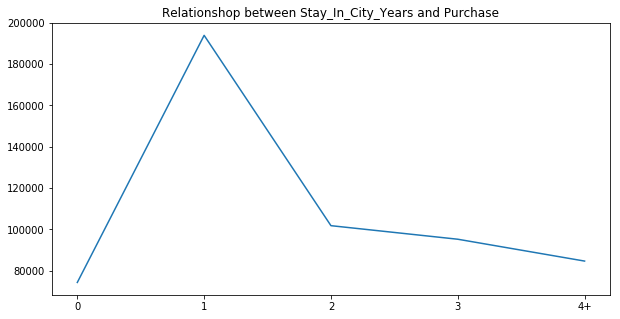

In [136]:
#Analysis of Stay_In_Current_City_Years and purchase

a=df.groupby(df["Stay_In_Current_City_Years"])["Purchase"].count().sort_values(ascending=False)
# understanding the relation between age and income with respect to gender
plt.figure(figsize = (10,5))
sns.lineplot(data=a)
plt.title('Relationshop between Stay_In_City_Years and Purchase')

Obs- 
People stay in current city for 1 year are more frequent to walmart and after then sudden decrease.

Text(0.5, 1.0, 'Relationshop between City_category and Purchase')

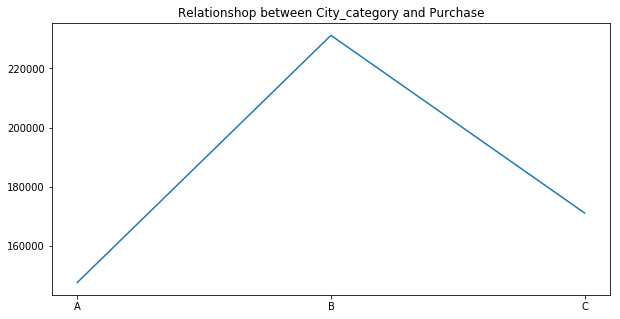

In [137]:
# Analysis between City_category and Purchase

b=df.groupby(df["City_Category"])["Purchase"].count().sort_values(ascending=False)
plt.figure(figsize = (10,5))
sns.lineplot(data=b)
plt.title('Relationshop between City_category and Purchase')

Obs- B category of city is more frequent to walmart

### Multivariate Analysis

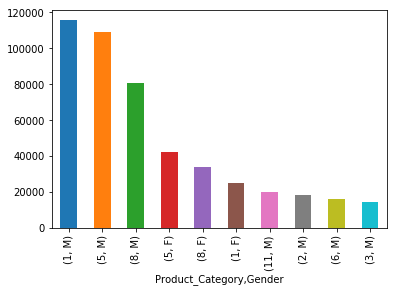

In [192]:
# Product_Category, Gender and Purchase

df.groupby(["Product_Category","Gender"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind="bar")

Obs-
Males are more purchasing product 5,1,8.
Females are purchasing 5, 8, 1 but less than males.

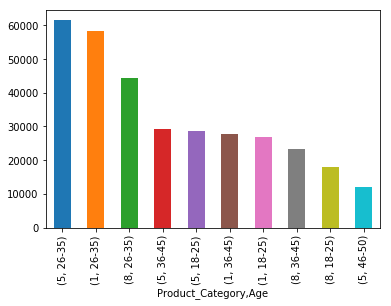

In [190]:
# Product_Category, Age and Purchase

df.groupby(["Product_Category","Age"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind="bar")

Obs-
Age group 26-35 are buying more 5,1,8 and 5 by 36-45 and 18-25 also.

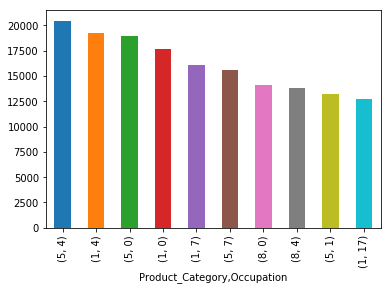

In [191]:
# Product_Category, Occupation and Purchase

df.groupby(["Product_Category","Occupation"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind="bar")

Obs-People having occupation 4,0,7 are more common buyers of 5,1,8.

In [139]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


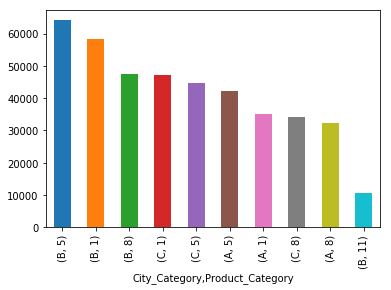

In [195]:
# Product_Category, Occupation and Purchase

df.groupby(["City_Category","Product_Category"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind="bar")

Obs- 

C is buying more 1 category.
B is focusing more on 5,1,8.
A is focusing more on 5,1.

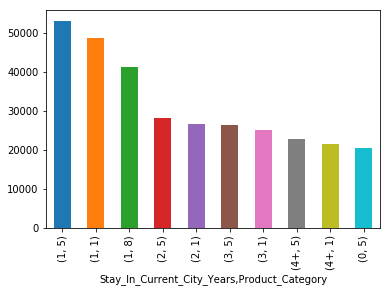

In [196]:
# Product_Category, Occupation and Purchase

df.groupby(["Stay_In_Current_City_Years","Product_Category"]).count()["Purchase"].sort_values(ascending=False)[0:10,].plot(kind="bar")

Obs-
People staying for 1,2 years are purchasing more 5,1,8.

## Male and Female Purchase interval
### Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

#### Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [140]:
male_df=df.loc[(df["Gender"]=="M"),"Purchase"]
pm=male_df.mean()
msd=np.std(male_df)
print("Male Population average spend amount is {}".format(pm))
print("Male Population standard deviation is {}".format(msd))

Male Population average spend amount is 9437.526040472265
Male Population standard deviation is 5092.180063635943


In [141]:
female_df=df.loc[(df["Gender"]=="F"),"Purchase"]
fm=female_df.mean()
fsd=np.std(female_df)
print("Female Population average spend amount is {}".format(fm))
print("Female Population standard deviation is {}".format(fsd))

Female Population average spend amount is 8734.565765155476
Female Population standard deviation is 4767.215738016988


In [142]:
#analysis of males and their purchase

a=df.loc[(df["Gender"]=="M"),"Purchase"].sum()
print("Total amount spent by males in Walmart is {}".format(a))
#total amount spent by males in walmart

Total amount spent by males in Walmart is 3909580100


In [143]:
#analysis of females and their purchase

a=df.loc[(df["Gender"]=="F"),"Purchase"].sum()
print("Total amount spent by females in Walmart is {}".format(a))

#total amount spent by females in walmart

Total amount spent by females in Walmart is 1186232642


In [144]:
# Male Spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_male_sample_means = []
for rep in range(num_repititions):
    sample_mean = male_df.sample(num_samples).mean()
    collect_male_sample_means.append(sample_mean)
    
male_final_mean=np.mean(collect_male_sample_means)    

print("Male average spending mean is {} ".format(male_final_mean))
print("Male average spending standard deviation is {} ".format(np.std(collect_male_sample_means)))

Male average spending mean is 9437.414123006667 
Male average spending standard deviation is 41.20668117192016 


## Finding out an 90%,95%, 99%Confidence Interval Using CLT.

### Confidence intervals and distribution of the mean of the expenses by female and male customers.

In [145]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (msd/np.sqrt(num_samples))

    confidence_interval.append ((male_final_mean - margin_of_error,
                           male_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (9369.227062179263, 9505.601183834071)
95%  Confidence interval:  (9355.922269822697, 9518.905976190637)
99%  Confidence interval:  (9330.560009392992, 9544.268236620343)


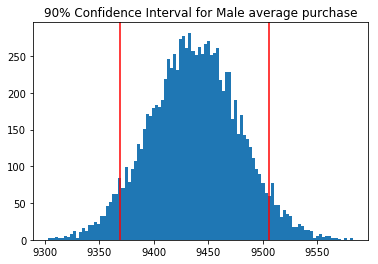

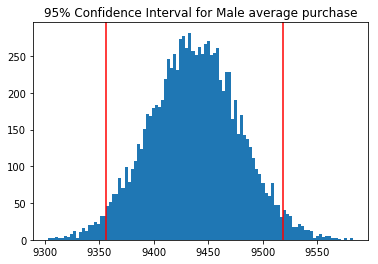

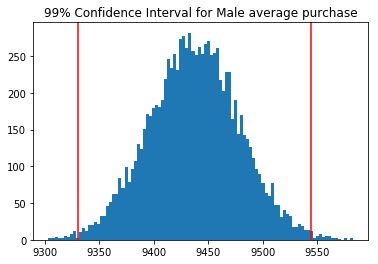

In [146]:
plt.hist(collect_male_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for Male average purchase")
plt.show()

plt.hist(collect_male_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for Male average purchase")
plt.show()

plt.hist(collect_male_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for Male average purchase")
plt.show()

### Female Spend Analysis

In [147]:
# Female spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_female_sample_means = []
for rep in range(num_repititions):
    sample_mean = female_df.sample(num_samples).mean()
    collect_female_sample_means.append(sample_mean)
    
female_final_mean=np.mean(collect_female_sample_means)

print("Female average spending mean is {} ".format(female_final_mean))
print("Female average spending standard deviation is {} ".format(np.std(collect_female_sample_means)))

Female average spending mean is 8735.219484706666 
Female average spending standard deviation is 36.99994496003322 


In [148]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (fsd/np.sqrt(num_samples))

    confidence_interval.append ((female_final_mean - margin_of_error,
                       female_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (8671.38387295624, 8799.055096457092)
95%  Confidence interval:  (8658.928143834206, 8811.510825579126)
99%  Confidence interval:  (8635.184410195328, 8835.254559218003)


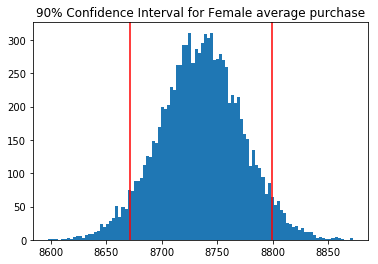

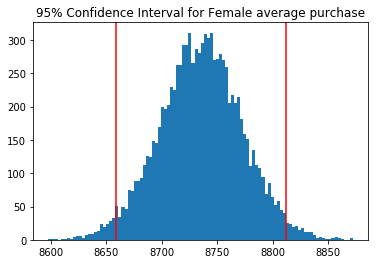

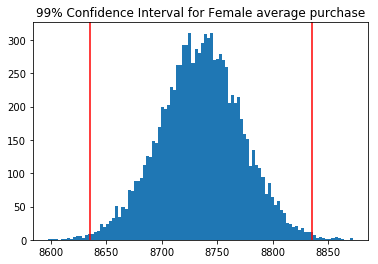

In [149]:
plt.hist(collect_female_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for Female average purchase")
plt.show()

plt.hist(collect_female_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for Female average purchase")
plt.show()

plt.hist(collect_female_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for Female average purchase")
plt.show()

### Answering questions
#### Are women spending more money per transaction than men? Why or Why not? 

Female and Male money per transaction average is calculated above and written below-

Male are spending more money per transaction than female

    Female average spending mean is 8735.219484706666 
    Female average spending standard deviation is 36.99994496003322 

    Male average spending mean is 9437.414123006667 
    Male average spending standard deviation is 41.20668117192016 


#### Confidence intervals and distribution of the mean of the expenses by female and male customers.

#### Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

## Married vs Unmarried Purchase Interval

In [152]:
married_df=df.loc[(df["Marital_Status"]=="Married"),"Purchase"]
mpm=married_df.mean()
msd=married_df.std()
print("Married Population average spend amount is {}".format(mpm))
print("Married Population standard deviation is {}".format(msd))

Married Population average spend amount is 9261.174574082374
Married Population standard deviation is 5016.89737779313


In [153]:
unmarried_df=df.loc[(df["Marital_Status"]=="Unmarried"),"Purchase"]
upm=unmarried_df.mean()
umsd=unmarried_df.std()
print("Ummaried Population average spend amount is {}".format(upm))
print("Unmarried Population standard deviation is {}".format(umsd))

Ummaried Population average spend amount is 9265.907618921507
Unmarried Population standard deviation is 5027.347858674457


In [154]:
# Married Spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_married_sample_means = []
for rep in range(num_repititions):
    sample_mean = married_df.sample(num_samples).mean()
    collect_married_sample_means.append(sample_mean)
    
married_final_mean=np.mean(collect_married_sample_means)    

print("Married people average spending mean is {} ".format(married_final_mean))
print("Married people average spending standard deviation is {} ".format(np.std(collect_married_sample_means)))

Married people average spending mean is 9262.218987133334 
Married people average spending standard deviation is 39.57915712861642 


## Finding out an 90%,95%, 99%Confidence Interval Using CLT.

### Confidence intervals and distribution of the mean of the expenses by married and unmarried customers.

In [157]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (msd/np.sqrt(num_samples))

    confidence_interval.append ((married_final_mean - margin_of_error,
                       married_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (9195.040002417667, 9329.397971849)
95%  Confidence interval:  (9181.931907839, 9342.506066427668)
99%  Confidence interval:  (9156.944602548416, 9367.493371718252)


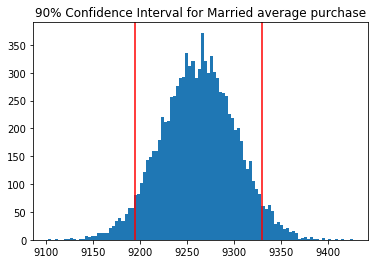

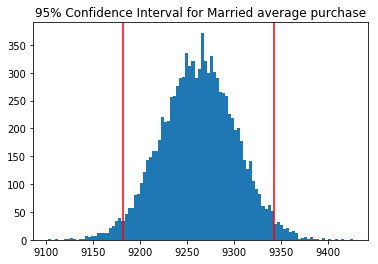

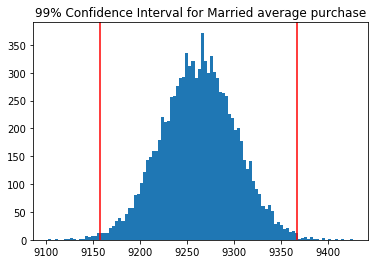

In [158]:
plt.hist(collect_married_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for Married average purchase")
plt.show()

plt.hist(collect_married_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for Married average purchase")
plt.show()

plt.hist(collect_married_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for Married average purchase")
plt.show()

In [159]:
# Unmarried Spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_unmarried_sample_means = []
for rep in range(num_repititions):
    sample_mean = unmarried_df.sample(num_samples).mean()
    collect_unmarried_sample_means.append(sample_mean)
    
unmarried_final_mean=np.mean(collect_unmarried_sample_means)    

print("UnMarried people average spending mean is {} ".format(unmarried_final_mean))
print("UnMarried people average spending standard deviation is {} ".format(np.std(collect_unmarried_sample_means)))

UnMarried people average spending mean is 9265.736828506666 
UnMarried people average spending standard deviation is 39.968580446221615 


In [160]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (umsd/np.sqrt(num_samples))

    confidence_interval.append ((unmarried_final_mean - margin_of_error,
                       unmarried_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (9198.417906167697, 9333.055750845635)
95%  Confidence interval:  (9185.282506686923, 9346.19115032641)
99%  Confidence interval:  (9160.243151426695, 9371.230505586636)


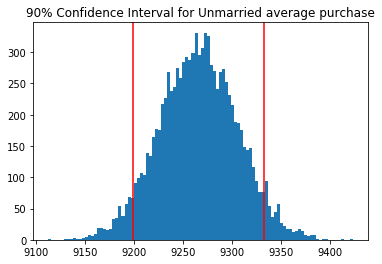

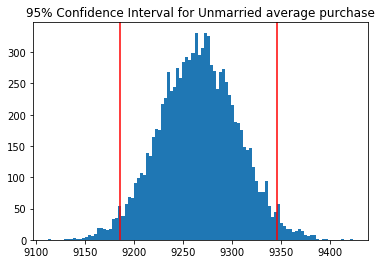

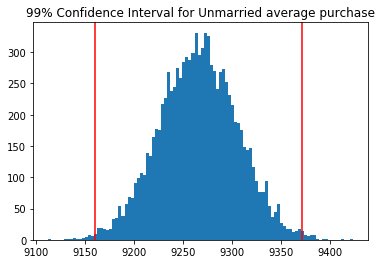

In [161]:
plt.hist(collect_unmarried_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for Unmarried average purchase")
plt.show()

plt.hist(collect_unmarried_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for Unmarried average purchase")
plt.show()

plt.hist(collect_unmarried_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for Unmarried average purchase")
plt.show()

### Answering questions
#### Are unmarried spending more money per transaction than married? Why or Why not? 

married and unmarried money per transaction average is calculated above and written below-

Unmarried are spending more money per transaction than married but there is no big difference between the two.

    UnMarried people average spending mean is 9265.736828506666 
    UnMarried people average spending standard deviation is 39.968580446221615 

    Married people average spending mean is 9262.218987133334 
    Married people average spending standard deviation is 39.57915712861642

#### Confidence intervals and distribution of the mean of the expenses by married and unmarried customers.

#### Are confidence intervals of average married and unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

## (26-35) Age Group Purchase Interval

In [162]:
Age_df=df.loc[(df["Age"]=="26-35"),"Purchase"]
apm=Age_df.mean()
asd=Age_df.std()
print("26-35 Age Population average spend amount is {}".format(apm))
print("26-35 Age Population standard deviation is {}".format(asd))

26-35 Age Population average spend amount is 9252.690632869888
26-35 Age Population standard deviation is 5010.527303002927


In [163]:
# Age group wise Spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_age_sample_means = []
for rep in range(num_repititions):
    sample_mean = Age_df.sample(num_samples).mean()
    collect_age_sample_means.append(sample_mean)
    
age_final_mean=np.mean(collect_age_sample_means)    

print("26-35 age people average spending mean is {} ".format(age_final_mean))
print("26-35 age people average spending standard deviation is {} ".format(np.std(collect_age_sample_means)))

26-35 age people average spending mean is 9252.15397848 
26-35 age people average spending standard deviation is 39.166152177381804 


# Finding out an 90%,95%, 99%Confidence Interval Using CLT.

## Confidence intervals and distribution of the mean of the expenses by Age-Groups

In [165]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (asd/np.sqrt(num_samples))

    confidence_interval.append ((age_final_mean - margin_of_error,
                       age_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (9184.894295632455, 9319.413661327546)
95%  Confidence interval:  (9171.770455076836, 9332.537501883166)
99%  Confidence interval:  (9146.753134017688, 9357.554822942313)


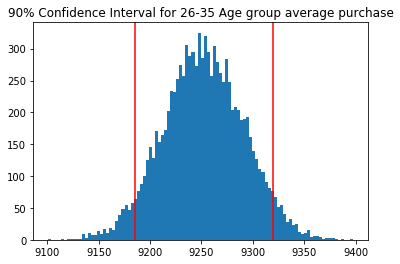

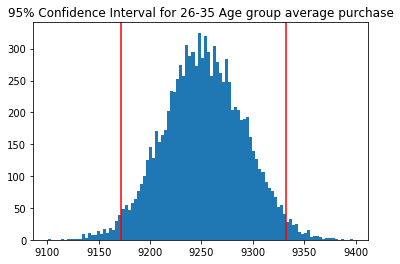

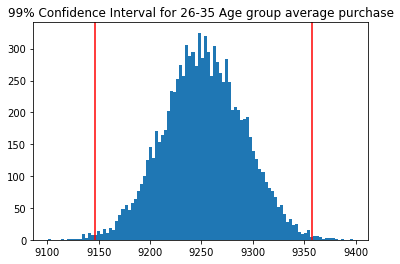

In [166]:
plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for 26-35 Age group average purchase")
plt.show()

plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for 26-35 Age group average purchase")
plt.show()

plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for 26-35 Age group average purchase")
plt.show()

## (36-45) Age Group Purchase Interval

In [164]:
Age_df=df.loc[(df["Age"]=="36-45"),"Purchase"]
apm=Age_df.mean()
asd=Age_df.std()
print("36-45 Age Population average spend amount is {}".format(apm))
print("36-45 Age Population standard deviation is {}".format(asd))

36-45 Age Population average spend amount is 9331.350694917874
36-45 Age Population standard deviation is 5022.923879204652


In [167]:
# Age group wise Spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_age_sample_means = []
for rep in range(num_repititions):
    sample_mean = Age_df.sample(num_samples).mean()
    collect_age_sample_means.append(sample_mean)
    
age_final_mean=np.mean(collect_age_sample_means)    

print("36-45 age people average spending mean is {} ".format(age_final_mean))
print("36-45 age people average spending standard deviation is {} ".format(np.std(collect_age_sample_means)))

36-45 age people average spending mean is 9331.757302000002 
36-45 age people average spending standard deviation is 38.35157797616893 


In [168]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (asd/np.sqrt(num_samples))

    confidence_interval.append ((age_final_mean - margin_of_error,
                       age_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (9264.497619152457, 9399.016984847547)
95%  Confidence interval:  (9251.373778596837, 9412.140825403167)
99%  Confidence interval:  (9226.35645753769, 9437.158146462314)


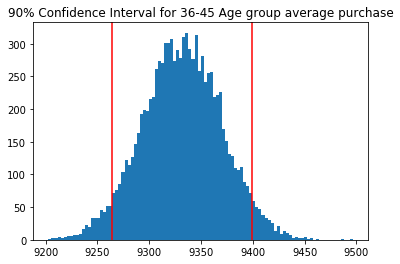

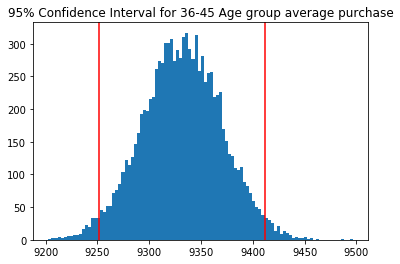

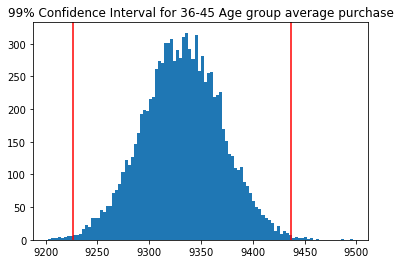

In [169]:
plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for 36-45 Age group average purchase")
plt.show()

plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for 36-45 Age group average purchase")
plt.show()

plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for 36-45 Age group average purchase")
plt.show()

### (18-25) Age Group Purchase Interval

In [170]:
Age_df=df.loc[(df["Age"]=="18-25"),"Purchase"]
apm=Age_df.mean()
asd=Age_df.std()
print("18-25 Age Population average spend amount is {}".format(apm))
print("18-25 Age Population standard deviation is {}".format(asd))

18-25 Age Population average spend amount is 9169.663606261289
18-25 Age Population standard deviation is 5034.321997176577


In [171]:
# Age group Spending sample average to find out an interval within which the population average will lie.

num_samples = 15000
num_repititions = 10000
collect_age_sample_means = []
for rep in range(num_repititions):
    sample_mean = Age_df.sample(num_samples).mean()
    collect_age_sample_means.append(sample_mean)
    
age_final_mean=np.mean(collect_age_sample_means)    

print("18-25 age people average spending mean is {} ".format(age_final_mean))
print("18-25 age people average spending standard deviation is {} ".format(np.std(collect_age_sample_means)))

18-25 age people average spending mean is 9169.91077366 
18-25 age people average spending standard deviation is 38.00528197425262 


In [172]:
#  the z-critical value
z_critical=[1.64,1.96,2.57]
conf_perc=["90%","95%","99%"]
confidence_interval=[]
for i in range(0,3):
    margin_of_error = z_critical[i] * (asd/np.sqrt(num_samples))

    confidence_interval.append ((age_final_mean - margin_of_error,
                       age_final_mean + margin_of_error)  )

    print(conf_perc[i]," Confidence interval: ", confidence_interval[i])

90%  Confidence interval:  (9102.498463813065, 9237.323083506935)
95%  Confidence interval:  (9089.344842379514, 9250.476704940485)
99%  Confidence interval:  (9064.270751521814, 9275.550795798186)


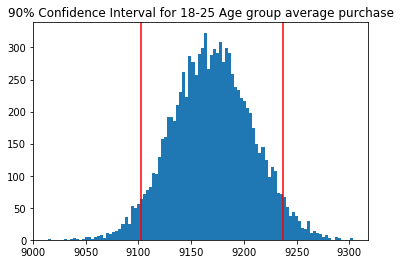

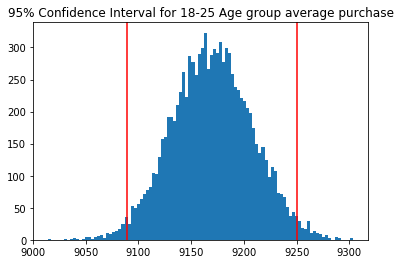

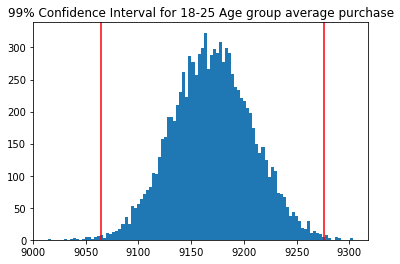

In [173]:
plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[0][0], c="r")
plt.axvline(x=confidence_interval[0][1], c="r")
plt.title("90% Confidence Interval for 18-25 Age group average purchase")
plt.show()

plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[1][0], c="r")
plt.axvline(x=confidence_interval[1][1], c="r")
plt.title("95% Confidence Interval for 18-25 Age group average purchase")
plt.show()

plt.hist(collect_age_sample_means,bins=100)
plt.axvline(x=confidence_interval[2][0], c="r")
plt.axvline(x=confidence_interval[2][1], c="r")
plt.title("99% Confidence Interval for 18-25 Age group average purchase")
plt.show()

### Answering questions
#### age group spending more money per transaction? 

Age group wise money per transaction average is calculated above and written below-


    26-35 age people average spending mean is 9252.15397848 
    26-35 age people average spending standard deviation is 39.166152177381804  

    36-45 age people average spending mean is 9331.757302000002 
    36-45 age people average spending standard deviation is 38.35157797616893 
    
    18-25 age people average spending mean is 9169.91077366 
    18-25 age people average spending standard deviation is 38.00528197425262



#### Are confidence intervals of average of different age group spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

There is overlapping in the confidence intervals of average of different age groups. All age groups purchase amount doesnt have much difference so lie in same bucket. Focus on everyone

#### Confidence intervals and distribution of the mean of the expenses by different age group customers.

In [174]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


## Business Insights

1. Median of purchase amounts is 8047, Max is 23961 and min is 12.
2. 26-35 age group is on top and 7 unique age.
3. city_category B is on top and 3 types of categories data available.
4. 1 year stay in current city people are on top.
5. Males ratio(3/4) is much higher as compare to female(1/4).
6. (26-35) Age group is frequent user of walmart then 36-45 and so on.
7. People having occupation 4,0,and 7 are top three frequent walmart user
8. B city category is most common user of Walmart.
9. people stay in the current city for 1 year are frequent to walmart.
10. 0 martial status people are more frequent to walmart.
11. Out of 21 Product category, 5,1 and 8 are most taken ones.
12. Purchase amount greater than 21000- 22000 are seems to be outliers
13. Out of total purchase, male purchase far more number of times than female.
14. Out of top 10 Product Category, 5,1 and 8 are most purchased ones.
15. In all given Age categories, 26-35 age group people are more frequent to walmart
16. People having Occupation 4,0,7 are more frequent to Walmart.
17. People stay in current city for 1 year are more frequent to walmart and after then sudden decrease.
18. B category of city is more frequent to walmart.
19. Male average spend is more than Female.
20. 36-45 age people average spending mean is 9331.757302000002 greater than other age groups
21. Unmarried are spending more money per transaction than married but there is no big difference between the two.
22. Males are more purchasing product 5,1,8 and Females are purchasing 5, 8, 1 but less than males.
23. Age group 26-35 are buying more 5,1,8 and 5 by 36-45 and 18-25 also.
24. People staying for 1,2 years are purchasing more 5,1,8.
25. C is buying more 1 category,B is focusing more on 5,1,8.,A is focusing more on 5,1.
26. People having occupation 4,0,7 are more common buyers of 5,1,8.
27. Confidence intervals and distribution of the mean of the expenses by different age group customers.
    26-35 customers confidence Interval-
    90%  Confidence interval:  (9184.894295632455, 9319.413661327546)
    95%  Confidence interval:  (9171.770455076836, 9332.537501883166)
    99%  Confidence interval:  (9146.753134017688, 9357.554822942313)

    36-45 customers confidence Interval-
    90%  Confidence interval:  (9264.497619152457, 9399.016984847547)
    95%  Confidence interval:  (9251.373778596837, 9412.140825403167)
    99%  Confidence interval:  (9226.35645753769, 9437.158146462314)

    18-25 customers confidence Interval-
    90%  Confidence interval:  (9102.498463813065, 9237.323083506935)
    95%  Confidence interval:  (9089.344842379514, 9250.476704940485)
    99%  Confidence interval:  (9064.270751521814, 9275.550795798186)
28. Confidence intervals and distribution of the mean of the expenses by female and male customers.
    Male customers confidence Interval-
    90%  Confidence interval:  (9369.227062179263, 9505.601183834071)
    95%  Confidence interval:  (9355.922269822697, 9518.905976190637)
    99%  Confidence interval:  (9330.560009392992, 9544.268236620343)

    Female customers confidence Interval-
    90%  Confidence interval:  (8671.38387295624, 8799.055096457092)
    95%  Confidence interval:  (8658.928143834206, 8811.510825579126)
    99%  Confidence interval:  (8635.184410195328, 8835.254559218003)
29. Confidence intervals and distribution of the mean of the expenses by married and unmarried customers.
    Married customers confidence Interval-
    90%  Confidence interval:  (9195.040002417667, 9329.397971849)
    95%  Confidence interval:  (9181.931907839, 9342.506066427668)
    99%  Confidence interval:  (9156.944602548416, 9367.493371718252)

    Unmarried customers confidence Interval-
    90%  Confidence interval:  (9198.417906167697, 9333.055750845635)
    95%  Confidence interval:  (9185.282506686923, 9346.19115032641)
    99%  Confidence interval:  (9160.243151426695, 9371.230505586636)

## Recommendations

1. Recommend to target Male customers(Purchase amount Confidence Interval is (9355.922269822697, 9518.905976190637)) as there average spend is more than female based on Purchase amount Confidence Interval (8658.928143834206, 8811.510825579126)) will give more business and to make business from female give some discounts or offers occassionally.

2. Target city category B who are staying in current city for about 1-2 years will give more profit, give them offers as they might be in home setup mode.

3. 5,1 and 8 are mostly purchased by males, so give offers on these products for more sale and females purchased 5 and 8 more so advertise them more accordingly.Out of 21 product category, only 4-5 categories are most bought ones, so target other categories also or give some product in combos under that.

4. Target Occupation 4,0,7 for products 1,5 and 8 having age group of 26-35. For others give combos or offers to increase sale.

5. Unmarried people are more frequent to walmart although there is no as such difference in the average spend of married and unmarried ans same with different age group, there confidence interval of average spent is overlapping so target everyone.